In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_labels.shape

(25000,)

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [18]:
len(train_data)

25000

In [65]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)（创建一个形状为 (len(sequences), dimension) 的零矩阵）
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.# set specific indices of results[i] to 1s（将 results[i] 的指定索引设为 1）
    return results
# Our vectorized training data（将训练数据向量化）
x_train = vectorize_sequences(train_data)
# Our vectorized test data（将测试数据向量化）
x_test = vectorize_sequences(test_data)

In [66]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [67]:
# Our vectorized labels（标签向量化）
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [68]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [73]:
x_train.shape

(25000, 10000)

In [74]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [75]:
x_val.shape

(10000, 10000)

In [76]:
partial_x_train.shape

(15000, 10000)

In [77]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5104 - binary_accuracy: 0.7893 - val_loss: 0.3863 - val_binary_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3056 - binary_accuracy: 0.9027 - val_loss: 0.3191 - val_binary_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2238 - binary_accuracy: 0.9290 - val_loss: 0.2772 - val_binary_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1740 - binary_accuracy: 0.9458 - val_loss: 0.3040 - val_binary_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1427 - binary_accuracy: 0.9539 - val_loss: 0.2819 - val_binary_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1175 - binary_accuracy: 0.9630 - val_loss: 0.2980 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - los

In [78]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

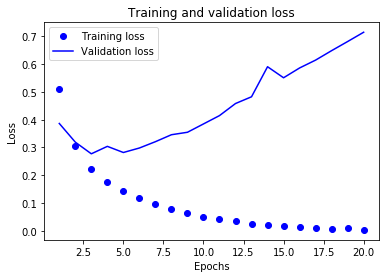

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"（'bo' 表示蓝色圆点）
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"（'b' 表示蓝色实线）
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

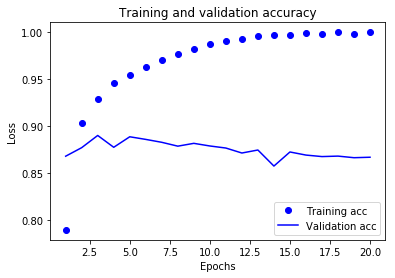

In [85]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [86]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4427 - accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2576 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1979 - accuracy: 0.9286
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8850


In [87]:
results

[0.2910444438457489, 0.8849599957466125]